Sveuƒçili≈°te u Zagrebu  
Fakultet elektrotehnike i raƒçunarstva  
  
## Strojno uƒçenje 1 2022/2023  
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Druga laboratorijska vje≈æba: Linearni diskriminativni modeli i logistiƒçka regresija

*Verzija: 1.1 (ispravljena gre≈°ka u tekstu prvog zadatka)  
Zadnji put a≈æurirano: 1. 10. 2021.*

(c) 2015-2022 Jan ≈†najder, Domagoj Alagiƒá  

Rok za predaju: **6. studenog 2022. u 23:59h**

------------------------------

### Upute

Druga laboratorijska vje≈æba sastoji se od ≈°est zadataka. U nastavku slijedite upute navedene u ƒáelijama s tekstom. Rje≈°avanje vje≈æbe svodi se na **dopunjavanje ove bilje≈ænice**: umetanja ƒáelije ili vi≈°e njih **ispod** teksta zadatka, pisanja odgovarajuƒáeg k√¥da te evaluiranja ƒáelija. 

Osigurajte da u potpunosti **razumijete** k√¥d koji ste napisali. Kod predaje vje≈æbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinaƒçiti i ponovno evaluirati Va≈° k√¥d. Nadalje, morate razumjeti teorijske osnove onoga ≈°to radite, u okvirima onoga ≈°to smo obradili na predavanju. Ispod nekih zadataka mo≈æete naƒái i pitanja koja slu≈æe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilje≈ænicu). Stoga se nemojte ograniƒçiti samo na to da rije≈°ite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vje≈æbi.

Vje≈æbe trebate raditi **samostalno**. Mo≈æete se konzultirati s drugima o naƒçelnom naƒçinu rje≈°avanja, ali u konaƒçnici morate sami odraditi vje≈æbu. U protivnome vje≈æba nema smisla.

In [2]:
# Uƒçitaj osnovne biblioteke...
import sklearn
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
def plot_2d_clf_problem(X, y, h=None):
    '''
    Plots a two-dimensional labeled dataset (X,y) and, if function h(x) is given, 
    the decision surfaces.
    '''
    assert X.shape[1] == 2, "Dataset is not two-dimensional"
    if h!=None : 
        # Create a mesh to plot in
        r = 0.04  # mesh resolution
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, r),
                             np.arange(y_min, y_max, r))
        XX=np.c_[xx.ravel(), yy.ravel()]
        try:
            Z_test = h(XX)
            if Z_test.shape == ():
                # h returns a scalar when applied to a matrix; map explicitly
                Z = np.array(list(map(h,XX)))
            else :
                Z = Z_test
        except ValueError:
            # can't apply to a matrix; map explicitly
            Z = np.array(list(map(h,XX)))
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)

    # Plot the dataset
    plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.tab20b, marker='o', s=50);

### 1. Linearna regresija kao klasifikator

U prethodnoj laboratorijskoj vje≈æbi koristili smo model linearne regresije za, naravno, regresiju. Meƒëutim, model linearne regresije mo≈æe se koristiti i za **klasifikaciju**. Iako zvuƒçi pomalo kontraintuitivno, zapravo je dosta jednostavno. Naime, cilj je nauƒçiti funkciju $f(\mathbf{x})$ koja za pozitivne primjere predviƒëa vrijednost $1$, dok za negativne primjere predviƒëa vrijednost $0$. U tom sluƒçaju, funkcija $f(\mathbf{x})=0.5$ predstavlja granicu izmeƒëu klasa, tj. primjeri za koje vrijedi $h(\mathbf{x})\geq 0.5$ klasificiraju se kao pozitivni, dok se ostali klasificiraju kao negativni.

Klasifikacija pomoƒáu linearne regresije implementirana je u razredu [`RidgeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html). U sljedeƒáim podzadatcima **istrenirajte** taj model na danim podatcima i **prika≈æite** dobivenu granicu izmeƒëu klasa. Pritom iskljuƒçite regularizaciju ($\alpha = 0$, odnosno `alpha=0`). Takoƒëer i ispi≈°ite **toƒçnost** va≈°eg klasifikacijskog modela (smijete koristiti funkciju [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). Skupove podataka vizualizirajte kori≈°tenjem pomoƒáne funkcije ``plot_clf_problem(X, y, h=None)`` koja je dana na poƒçetku ove bilje≈ænice. `X` i `y` predstavljaju ulazne primjere i oznake, dok `h` predstavlja funkciju predikcije modela (npr. `model.predict`). 

U ovom zadatku cilj je razmotriti kako se klasifikacijski model linearne regresije pona≈°a na linearno odvojim i neodvojivim podatcima.

In [4]:
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.metrics import accuracy_score

### (a)

Prvo, isprobajte *ugraƒëeni* model na linearno odvojivom skupu podataka `seven` ($N=7$).

In [5]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

Tocnost = 1.0


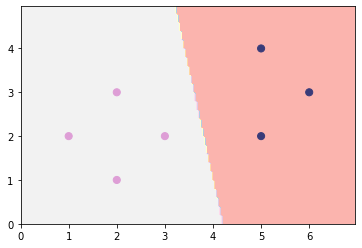

In [6]:
# Va≈° k√¥d ovdje
model = RidgeClassifier(alpha=0).fit(seven_X, seven_y)
y_pred = model.predict(seven_X)
tocnost = accuracy_score(seven_y, y_pred)
print('Tocnost = {}'.format(tocnost))

plot_2d_clf_problem(seven_X, seven_y, model.predict)

Kako bi se uvjerili da se u isprobanoj implementaciji ne radi o niƒçemu doli o obiƒçnoj linearnoj regresiji, napi≈°ite k√¥d koji dolazi do jednakog rje≈°enja kori≈°tenjem iskljuƒçivo razreda [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Funkciju za predikciju, koju predajete kao treƒái argument `h` funkciji `plot_2d_clf_problem`, mo≈æete definirati lambda-izrazom: `lambda x : model.predict(x) >= 0.5`.

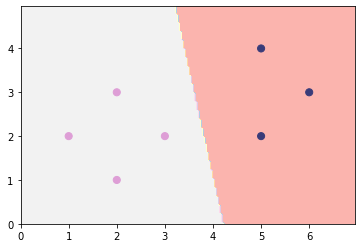

In [7]:
# Va≈° k√¥d ovdje
model = LinearRegression().fit(seven_X, seven_y)
plot_2d_clf_problem(seven_X, seven_y, lambda x : model.predict(x) >= 0.5)

**Q:** Kako bi bila definirana granica izmeƒëu klasa ako bismo koristili oznake klasa $-1$ i $1$ umjesto $0$ i $1$?

### (b)  

Probajte isto na linearno odvojivom skupu podataka `outlier` ($N=8$):

In [8]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

Tocnost = 0.875


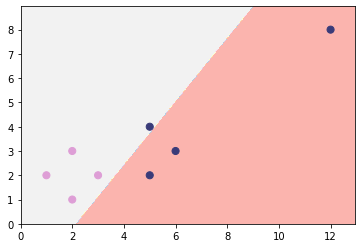

In [9]:
# Va≈° k√¥d ovdje
model = RidgeClassifier(alpha=0).fit(outlier_X, outlier_y)
y_pred = model.predict(outlier_X)
tocnost = accuracy_score(outlier_y, y_pred)
print('Tocnost = {}'.format(tocnost))

plot_2d_clf_problem(outlier_X, outlier_y, model.predict)

**Q:** Za≈°to model ne ostvaruje potpunu toƒçnost iako su podatci linearno odvojivi?

### (c)  

Zavr≈°no, probajte isto na linearno neodvojivom skupu podataka `unsep` ($N=8$):

In [10]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

Tocnost = 0.875


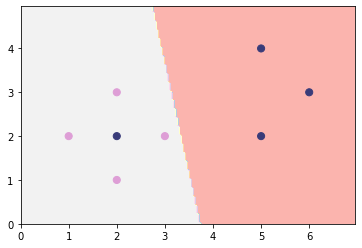

In [11]:
# Va≈° k√¥d ovdje
model = RidgeClassifier(alpha=0).fit(unsep_X, unsep_y)
y_pred = model.predict(unsep_X)
tocnost = accuracy_score(unsep_y, y_pred)
print('Tocnost = {}'.format(tocnost))

plot_2d_clf_problem(unsep_X, unsep_y, model.predict)

**Q:** Oƒçito je za≈°to model nije u moguƒánosti postiƒái potpunu toƒçnost na ovom skupu podataka. Meƒëutim, smatrate li da je problem u modelu ili u podacima? Argumentirajte svoj stav.

### 2. Vi≈°eklasna klasifikacija

Postoji vi≈°e naƒçina kako se binarni klasifikatori mogu se upotrijebiti za vi≈°eklasnu klasifikaciju. Najƒçe≈°ƒáe se koristi shema tzv. **jedan-naspram-ostali** (engl. *one-vs-rest*, OVR), u kojoj se trenira po jedan klasifikator $h_j$ za svaku od $K$ klasa. Svaki klasifikator $h_j$ trenira se da razdvaja primjere klase $j$ od primjera svih drugih klasa, a primjer se klasificira u klasu $j$ za koju je $h_j(\mathbf{x})$ maksimalan.

Pomoƒáu funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte sluƒçajan dvodimenzijski skup podataka od tri klase i prika≈æite ga koristeƒái funkciju `plot_2d_clf_problem`. Radi jednostavnosti, pretpostavite da nema redundantnih znaƒçajki te da je svaka od klasa "zbijena" upravo u jednu grupu.

Text(0.5, 1.0, 'Dvodimenzijski skup podataka')

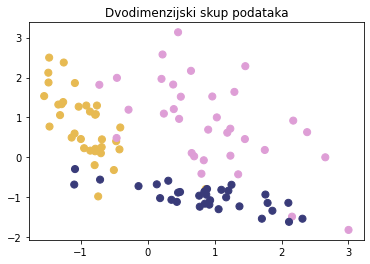

In [12]:
from sklearn.datasets import make_classification

# Va≈° k√¥d ovdje
X, y = make_classification(n_features=2, n_redundant=0, n_classes=3, n_clusters_per_class=1)
plot_2d_clf_problem(X, y)
plt.title('Dvodimenzijski skup podataka')

Trenirajte tri binarna klasifikatora, $h_1$, $h_2$ i $h_3$ te prika≈æite granice izmeƒëu klasa (tri grafikona). Zatim definirajte $h(\mathbf{x})=\mathrm{argmax}_j h_j(\mathbf{x})$  (napi≈°ite svoju funkciju `predict` koja to radi) i prika≈æite granice izmeƒëu klasa za taj model. Zatim se uvjerite da biste identiƒçan rezultat dobili izravno primjenom modela `RidgeClassifier`, buduƒái da taj model za vi≈°eklasan problem zapravo interno implementira shemu jedan-naspram-ostali.

**Q:** Alternativna shema jest ona zvana **jedan-naspram-jedan** (engl, *one-vs-one*, OVO). Koja je prednost sheme OVR nad shemom OVO? A obratno?

Text(0.5, 1.0, 'ridge classifier')

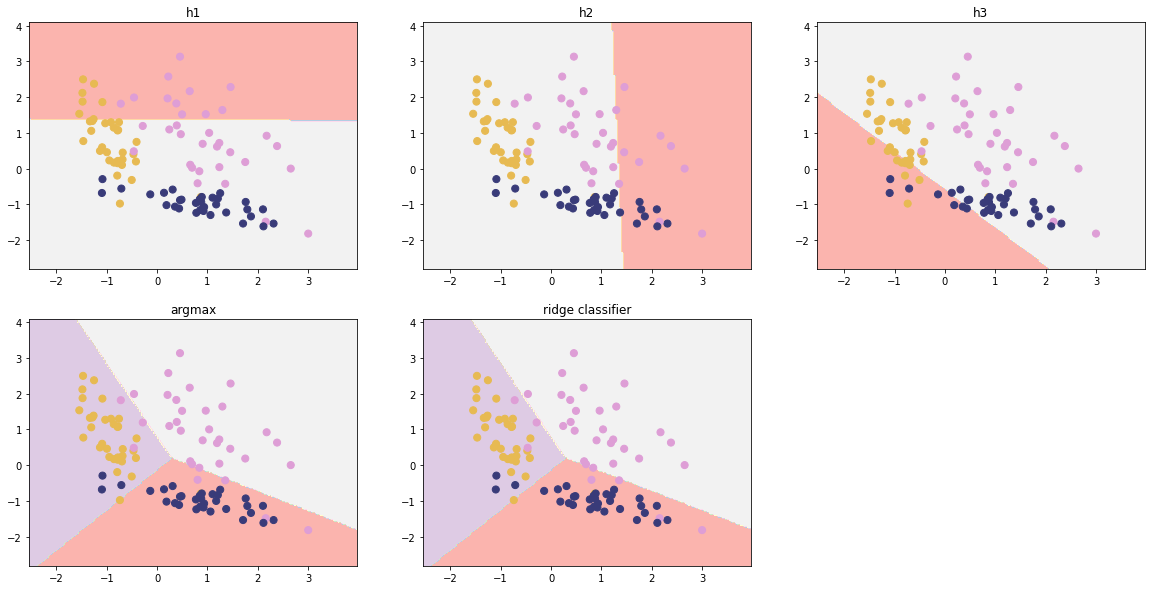

In [13]:
# Va≈° k√¥d ovdje
import numpy as np

# 1.dio
y1, y2, y3 = [], [], []
for i in y:
  if (i == 0):
    y1.append(1)
    y2.append(0)
    y3.append(0)
  elif (i == 1):
    y1.append(0)
    y2.append(1)
    y3.append(0)
  elif (i == 2):
    y1.append(0)
    y2.append(0)
    y3.append(1)
  else:
    break

model1 = LinearRegression().fit(X, y1)
model2 = LinearRegression().fit(X, y2)
model3 = LinearRegression().fit(X, y3)

h1 = lambda x: model1.predict(x) > 0
h2 = lambda x: model2.predict(x) > 0
h3 = lambda x: model3.predict(x) > 0

# 2.dio
def predict():
  return lambda x: np.argmax([model1.predict(x.reshape(1, -1)), model2.predict(x.reshape(1, -1)), model3.predict(x.reshape(1, -1))])
h_argmax = predict()

# 3.dio 
model_ridge = RidgeClassifier().fit(X, y)

plt.figure(figsize= (20, 10))
plt.subplot(2,3,1)
plot_2d_clf_problem(X, y, h1)
plt.title('h1')
plt.subplot(2,3,2)
plot_2d_clf_problem(X, y, h2)
plt.title('h2')
plt.subplot(2,3,3)
plot_2d_clf_problem(X, y, h3)
plt.title('h3')
plt.subplot(2,3,4)
plot_2d_clf_problem(X, y, h_argmax)
plt.title('argmax')
plt.subplot(2,3,5)
plot_2d_clf_problem(X, y, model_ridge.predict)
plt.title('ridge classifier')

### 3. Logistiƒçka regresija

Ovaj zadatak bavi se probabilistiƒçkim diskriminativnim modelom, **logistiƒçkom regresijom**, koja je, unatoƒç nazivu, klasifikacijski model.

Logistiƒçka regresija tipiƒçan je predstavnik tzv. **poopƒáenih linearnih modela** koji su oblika: $h(\mathbf{x})=f(\mathbf{w}^\intercal\tilde{\mathbf{x}})$. Logistiƒçka funkcija za funkciju $f$ koristi tzv. **logistiƒçku** (sigmoidalnu) funkciju $\sigma (x) = \frac{1}{1 + \textit{exp}(-x)}$.

### (a)  

Definirajte logistiƒçku (sigmoidalnu) funkciju $\mathrm{sigm}(x)=\frac{1}{1+\exp(-\alpha x)}$ i prika≈æite je za $\alpha\in\{1,2,4\}$.

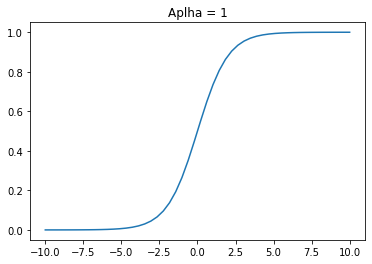

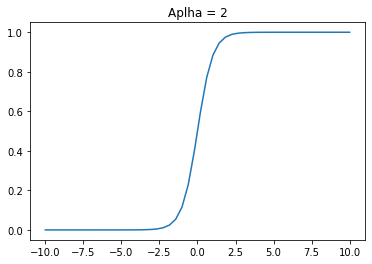

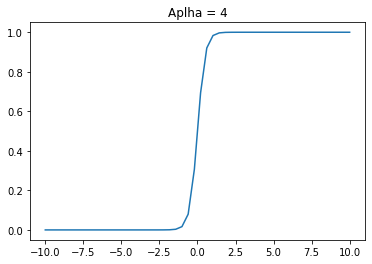

In [14]:
# Va≈° k√¥d ovdje
def sigm(x): 
  return 1/(1 + np.exp(-x))

alpha = [1, 2, 4]
x = np.linspace(-10, 10)

for a in alpha:
  plt.figure()
  plt.title('Aplha = {}'.format(a))
  plt.plot(x, sigm(x*a))

**Q**: Za≈°to je sigmoidalna funkcija prikladan izbor za aktivacijsku funkciju poopƒáenoga linearnog modela? 
</br>

**Q**: Kakav utjecaj ima faktor $\alpha$ na oblik sigmoide? ≈†to to znaƒçi za model logistiƒçke regresije (tj. kako izlaz modela ovisi o normi vektora te≈æina $\mathbf{w}$)?

### (b) 

Implementirajte funkciju 

> `lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False)` 

za treniranje modela logistiƒçke regresije gradijentnim spustom (*batch* izvedba). Funkcija uzima oznaƒçeni skup primjera za uƒçenje (matrica primjera `X` i vektor oznaka `y`) te vraƒáa $(n+1)$-dimenzijski vektor te≈æina tipa `ndarray`. Ako je `trace=True`, funkcija dodatno vraƒáa listu (ili matricu) vektora te≈æina $\mathbf{w}^0,\mathbf{w}^1,\dots,\mathbf{w}^k$ generiranih kroz sve iteracije optimizacije, od 0 do $k$. Optimizaciju treba provoditi dok se ne dosegne `max_iter` iteracija, ili kada razlika u pogre≈°ci unakrsne entropije izmeƒëu dviju iteracija padne ispod vrijednosti `epsilon`. Parametar `alpha` predstavlja faktor L2-regularizacije.

Preporuƒçamo definiranje pomoƒáne funkcije `lr_h(x,w)` koja daje predikciju za primjer `x` uz zadane te≈æine `w`. Takoƒëer, preporuƒçamo i funkciju `cross_entropy_error(X,y,w)` koja izraƒçunava pogre≈°ku unakrsne entropije modela na oznaƒçenom skupu `(X,y)` uz te iste te≈æine.

**NB:** Obratite pozornost na to da je naƒçin kako su definirane oznake ($\{+1,-1\}$ ili $\{1,0\}$) kompatibilan s izraƒçunom funkcije gubitka u optimizacijskome algoritmu.

In [1]:
from numpy import linalg
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import log_loss

def lr_h(x,w):
  phi = PolynomialFeatures(1).fit_transform(x.reshape(1, -1))
  var_sigm = sigm(np.dot(phi, w))
  return var_sigm

def cross_entropy_error(X,y,w,h):
  return -y * np.log(h) - (1-y) * np.log(1-h)


def lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False):
    # Va≈° k√¥d ovdje
    w = np.zeros(np.shape(X)[1] + 1)  # np.shape(seven_X) = (7,2) --> w = [w0, w1, w2]
    w_trace = []
    previous_error = 0                # initial error
    done = -1
    
    for i in range(max_iter):
      dw0 = 0                           # w0
      dw = np.zeros(np.shape(X)[1])     # w1, w2
      error = 0

      for j in range(np.shape(X)[0]):   # N = np.shape(X)[0] --> broj primjera
        h = lr_h(X[j], w)
        dw0 += h - y[j]
        dw += (h - y[j]) * X[j]
        error += cross_entropy_error(X[j], y[j], w, h)

      if (abs(error - previous_error) < epsilon):
        done = i
        print('Razlika u pogre≈°ci unakrsne entropije izmeƒëu dviju iteracija pala je ispod vrijednosti epsilona u iteraciji {}'.format(done))
        break
      else:
        previous_error = error

      w[0] -= eta * dw0
      w[1:] = w[1:] * (1-eta*alpha) - eta * dw

      w_trace.extend(w)
      done = i

    print('number of iter {}'.format(done))
    if trace: return w, w_trace
    else: return w

### (c)

Koristeƒái funkciju `lr_train`, trenirajte model logistiƒçke regresije na skupu `seven`, prika≈æite dobivenu granicu izmeƒëu klasa te  izraƒçunajte pogre≈°ku unakrsne entropije. 

**NB:** Pripazite da modelu date dovoljan broj iteracija.

In [15]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

number of iter 1999
w:  [ 6.44150959 -2.11012128  0.53522851]
cross entropy error:  0.07751718252492557


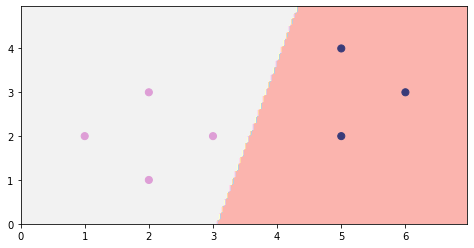

In [16]:
# Va≈° k√¥d ovdje

# nova funkcija zbog h i dimenzija od x
def cross_entropy_error2(X, y, w):
  error_tmp = []
  error = 0
  phi = PolynomialFeatures(1).fit_transform(X)
  var_sigm = sigm(np.dot(phi, w))
  error_tmp = -y * np.log(var_sigm) - (1-y) * np.log(1-var_sigm)
  for elem in error_tmp:  
    error += elem
  error /= np.shape(X)[0]   # E = (1/n) * sum(svi elem iz error_tmp)
  return error

w_all = lr_train(seven_X, seven_y)
h = lambda x: lr_h(x, w_all) > 0.5

error = cross_entropy_error2(seven_X, seven_y, w_all)

print('w: ', w_all)
print('cross entropy error: ', error)
plt.figure(figsize=(8,4))
plot_2d_clf_problem(seven_X, seven_y, h)

**Q:** Koji kriterij zaustavljanja je aktiviran?

**Q:** Za≈°to dobivena pogre≈°ka unakrsne entropije nije jednaka nuli?

**Q:** Kako biste utvrdili da je optimizacijski postupak doista prona≈°ao hipotezu koja minimizira pogre≈°ku uƒçenja? O ƒçemu to ovisi?

**Q:** Na koji naƒçin biste preinaƒçili k√¥d ako biste htjeli da se optimizacija izvodi stohastiƒçkim gradijentnim spustom (*online learning*)?

### (d)

Prika≈æite na jednom grafikonu pogre≈°ku unakrsne entropije (oƒçekivanje logistiƒçkog gubitka) i pogre≈°ku klasifikacije (oƒçekivanje gubitka 0-1) na skupu `seven` kroz iteracije optimizacijskog postupka. Koristite trag te≈æina funkcije `lr_train` iz zadatka (b) (opcija `trace=True`). Na drugom grafikonu prika≈æite pogre≈°ku unakrsne entropije kao funkciju broja iteracija za razliƒçite stope uƒçenja, $\eta\in\{0.005,0.01,0.05,0.1\}$.

In [17]:
from sklearn.metrics import zero_one_loss

number of iter 1999
number of iter 1999
number of iter 1999
Razlika u pogre≈°ci unakrsne entropije izmeƒëu dviju iteracija pala je ispod vrijednosti epsilona u iteraciji 1544
number of iter 1544
Razlika u pogre≈°ci unakrsne entropije izmeƒëu dviju iteracija pala je ispod vrijednosti epsilona u iteraciji 1128
number of iter 1128


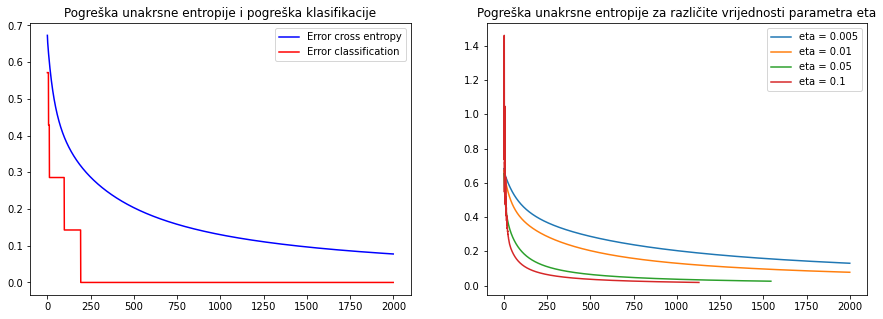

In [18]:
# Va≈° k√¥d ovdje
eta = [0.005,0.01,0.05,0.1]
error_crossEntropy, error_classification, error_crossEntropy_eta = [], [], []
w, w_trace = lr_train(seven_X, seven_y, trace=True)
phi = PolynomialFeatures(1).fit_transform(seven_X)
h = lambda x: x >= 0.5                

# 1.dio
for i in range(0, len(w_trace), 3):
  error_crossEntropy.append(cross_entropy_error2(seven_X, seven_y, w_trace[i:i+3]))
  seven_y_pred = h(sigm(np.dot(phi, w_trace[i:i+3])))
  error_classification.append(zero_one_loss(seven_y, seven_y_pred)) # gubitak 0-1

# 2.dio 
for elem in eta:
  error_tmp = []
  w, w_trace = lr_train(seven_X, seven_y, eta=elem, trace=True)

  for i in range(0, len(w_trace), 3):
    error_tmp.append(cross_entropy_error2(seven_X, seven_y, w_trace[i:i+3]))
  
  error_crossEntropy_eta.append(error_tmp)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(error_crossEntropy, 'b', label='Error cross entropy')
plt.plot(error_classification, 'r', label='Error classification')
plt.legend()
plt.title('Pogre≈°ka unakrsne entropije i pogre≈°ka klasifikacije')

plt.subplot(1,2,2)
for i in range(len(eta)):
  plt.plot(error_crossEntropy_eta[i], label='eta = {}'.format(eta[i]))
plt.legend()
plt.title('Pogre≈°ka unakrsne entropije za razliƒçite vrijednosti parametra eta')
plt.show()


**Q:** Za≈°to je pogre≈°ka unakrsne entropije veƒáa od pogre≈°ke klasifikacije? Je li to uvijek sluƒçaj kod logistiƒçke regresije i za≈°to?

**Q:** Koju stopu uƒçenja $\eta$ biste odabrali i za≈°to?

### (e)

Upoznajte se s klasom [`linear_model.LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) koja implementira logistiƒçku regresiju. Usporedite rezultat modela na skupu `seven` s rezultatom koji dobivate pomoƒáu vlastite implementacije algoritma.

**NB:** Kako ugraƒëena implementacija koristi naprednije verzije optimizacije funkcije, vrlo je vjerojatno da Vam se rje≈°enja neƒáe poklapati, ali generalne performanse modela bi trebale. Ponovno, pripazite na broj iteracija i snagu regularizacije.

Text(0.5, 1.0, 'Sa L2 regularizacijom')

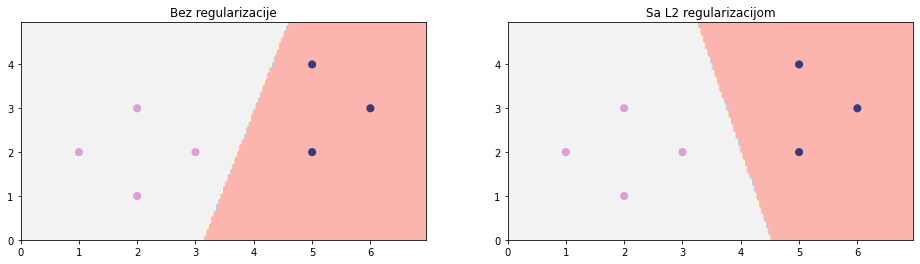

In [32]:
from sklearn.linear_model import LogisticRegression

# Va≈° k√¥d ovdje
model = LogisticRegression(penalty='none', max_iter=2000, tol=0.0001).fit(seven_X, seven_y) # penalty='none' nema kaznavanja sto znaci da nema ni l1 ni l2 normi tj regularizacija  
model2 = LogisticRegression(max_iter=2000, tol=0.0001).fit(seven_X, seven_y)
h = lambda x: model.predict(x)
h2 = lambda x: model2.predict(x)

plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plot_2d_clf_problem(seven_X, seven_y, h)
plt.title('Bez regularizacije')
plt.subplot(1,2,2)
plot_2d_clf_problem(seven_X, seven_y, h2)
plt.title('Sa L2 regularizacijom')

### 4. Analiza logistiƒçke regresije

### (a)

Koristeƒái ugraƒëenu implementaciju logistiƒçke regresije, provjerite kako se logistiƒçka regresija nosi s vrijednostima koje odskaƒçu. Iskoristite skup `outlier`. Prika≈æite granicu izmeƒëu klasa.

In [20]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

number of iter 1999


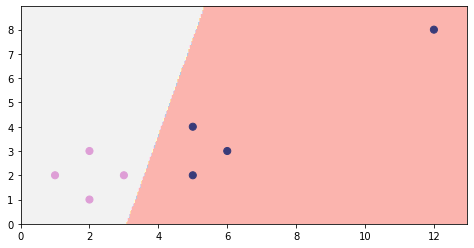

In [21]:
# Va≈° k√¥d ovdje
w_all = lr_train(outlier_X, outlier_y)
h = lambda x: lr_h(x, w_all) > 0.5

plt.figure(figsize=(8,4))
plot_2d_clf_problem(outlier_X, outlier_y, h)

**Q:** Za≈°to se rezultat razlikuje od onog koji je dobio model klasifikacije linearnom regresijom iz prvog zadatka?

### (b)

Trenirajte model logistiƒçke regresije na skupu `seven` te na dva odvojena grafikona prika≈æite, kroz iteracije optimizacijskoga algoritma, (1) izlaz modela $h(\mathbf{x})$ za svih sedam primjera te (2) vrijednosti te≈æina $w_0$, $w_1$, $w_2$.

number of iter 1999


Text(0.5, 1.0, 'Vrijednosti te≈æina w0, w1, w2')

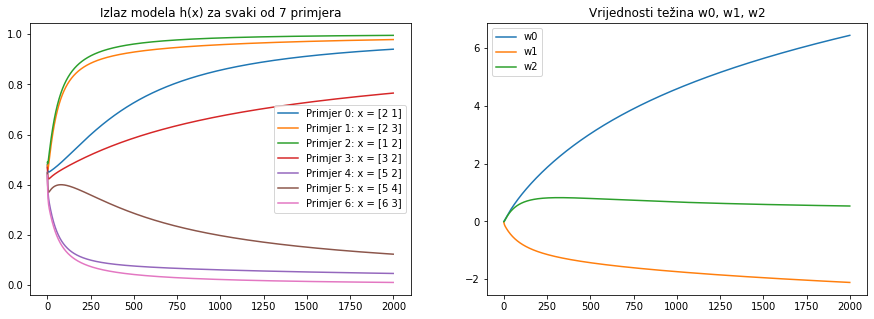

In [22]:
# Va≈° k√¥d ovdje
w, w_trace = lr_train(seven_X, seven_y, trace=True)
h, w0, w1, w2 = [], [], [], []

# 1.dio
for i in range(np.shape(seven_X)[0]):
  h_tmp = []
  for j in range(0, len(w_trace), 3):
    h_tmp.append(lr_h(seven_X[i],w_trace[j:j+3]))
  h.append(h_tmp)

# 2.dio
for i in range(0, len(w_trace), 3):
  w0.append(w_trace[i])
  w1.append(w_trace[i+1])
  w2.append(w_trace[i+2])

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
for i in range(len(h)):
  plt.plot(h[i], label='Primjer {}: x = {}'.format(i, seven_X[i]))
plt.legend()
plt.title('Izlaz modela h(x) za svaki od 7 primjera')

plt.subplot(1,2,2)
plt.plot(w0, label='w0')
plt.plot(w1, label='w1')
plt.plot(w2, label='w2')
plt.legend()
plt.title('Vrijednosti te≈æina w0, w1, w2')

### (c)

Ponovite eksperiment iz podzadatka (b) koristeƒái linearno neodvojiv skup podataka `unsep`.

In [23]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

Razlika u pogre≈°ci unakrsne entropije izmeƒëu dviju iteracija pala je ispod vrijednosti epsilona u iteraciji 1315
number of iter 1315


Text(0.5, 1.0, 'Vrijednosti te≈æina w0, w1, w2')

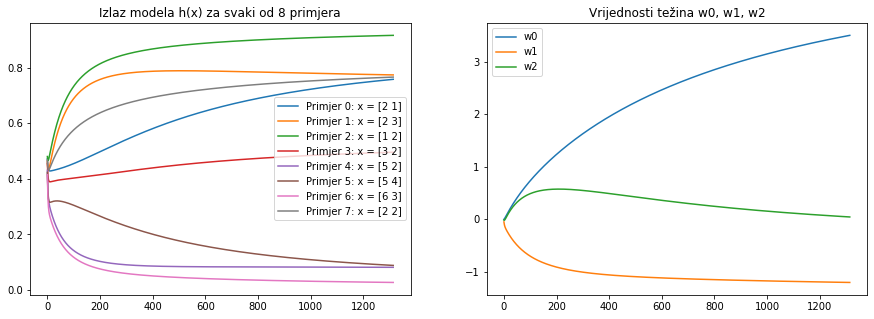

In [24]:
# Va≈° k√¥d ovdje
w, w_trace = lr_train(unsep_X, unsep_y, trace=True)
h, w0, w1, w2 = [], [], [], []

# 1.dio
for i in range(np.shape(unsep_X)[0]):
  h_tmp = []
  for j in range(0, len(w_trace), 3):
    h_tmp.append(lr_h(unsep_X[i],w_trace[j:j+3]))
  h.append(h_tmp)

# 2.dio
for i in range(0, len(w_trace), 3):
  w0.append(w_trace[i])
  w1.append(w_trace[i+1])
  w2.append(w_trace[i+2])

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
for i in range(len(h)):
  plt.plot(h[i], label='Primjer {}: x = {}'.format(i, unsep_X[i]))
plt.legend()
plt.title('Izlaz modela h(x) za svaki od 8 primjera')

plt.subplot(1,2,2)
plt.plot(w0, label='w0')
plt.plot(w1, label='w1')
plt.plot(w2, label='w2')
plt.legend()
plt.title('Vrijednosti te≈æina w0, w1, w2')

**Q:** Usporedite grafikone za sluƒçaj linearno odvojivih i linearno neodvojivih primjera te komentirajte razliku.

### 5. Regularizirana logistiƒçka regresija

Trenirajte model logistiƒçke regresije na skupu `seven` s razliƒçitim faktorima L2-regularizacije, $\alpha\in\{0,1,10,100\}$. Prika≈æite na dva odvojena grafikona (1) pogre≈°ku unakrsne entropije te (2) L2-normu vektora $\mathbf{w}$ kroz iteracije optimizacijskog algoritma.

In [25]:
from numpy.linalg import norm

Razlika u pogre≈°ci unakrsne entropije izmeƒëu dviju iteracija pala je ispod vrijednosti epsilona u iteraciji 1315
number of iter 1315
Razlika u pogre≈°ci unakrsne entropije izmeƒëu dviju iteracija pala je ispod vrijednosti epsilona u iteraciji 1177
number of iter 1177
Razlika u pogre≈°ci unakrsne entropije izmeƒëu dviju iteracija pala je ispod vrijednosti epsilona u iteraciji 590
number of iter 590
Razlika u pogre≈°ci unakrsne entropije izmeƒëu dviju iteracija pala je ispod vrijednosti epsilona u iteraciji 141
number of iter 141


Text(0.5, 1.0, 'L2-norma vektora w')

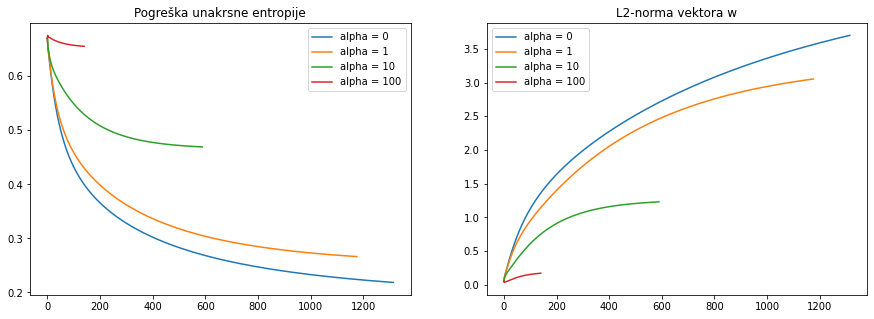

In [26]:
# Va≈° k√¥d ovdje

alpha = [0, 1, 10, 100]
error_crossEntropy, l2_norm = [], []

# 1. i 2.dio 
for a in alpha:
  w, w_trace = lr_train(unsep_X, unsep_y, alpha=a, trace=True)

  error_crossEntropy_tmp = []
  l2_norm_tmp = []
  for i in range(0, len(w_trace), 3):
    error_crossEntropy_tmp.append(cross_entropy_error2(seven_X, seven_y, w_trace[i:i+3]))
    l2_norm_tmp.append(np.linalg.norm(w_trace[i:i+3]))

  l2_norm.append(l2_norm_tmp)
  error_crossEntropy.append(error_crossEntropy_tmp)
  
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
for i in range(len(error_crossEntropy)):
  plt.plot(error_crossEntropy[i], label='alpha = {}'.format(alpha[i]))
plt.legend()
plt.title('Pogre≈°ka unakrsne entropije')

plt.subplot(1,2,2)
for i in range(len(l2_norm)):
  plt.plot(l2_norm[i], label='alpha = {}'.format(alpha[i]))
plt.legend()
plt.title('L2-norma vektora w')

**Q:** Jesu li izgledi krivulja oƒçekivani i za≈°to?

**Q:** Koju biste vrijednost za $\alpha$ odabrali i za≈°to?

### 6. Logistiƒçka regresija s funkcijom preslikavanja

Prouƒçite funkciju [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). Generirajte i prika≈æite dvoklasan skup podataka s ukupno $N=100$ dvodimenzijskih ($n=2)$ primjera, i to sa dvije grupe po klasi (`n_clusters_per_class=2`). Malo je izgledno da ƒáe tako generiran skup biti linearno odvojiv, meƒëutim to nije problem jer primjere mo≈æemo preslikati u vi≈°edimenzijski prostor znaƒçajki pomoƒáu klase [`preprocessing.PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), kao ≈°to smo to uƒçinili kod linearne regresije u prvoj laboratorijskoj vje≈æbi. Trenirajte model logistiƒçke regresije koristeƒái za preslikavanje u prostor znaƒçajki polinomijalnu funkciju stupnja $d=2$ i stupnja $d=3$. Prika≈æite dobivene granice izmeƒëu klasa. Mo≈æete koristiti svoju implementaciju, ali se radi brzine preporuƒça koristiti `linear_model.LogisticRegression`. Regularizacijski faktor odaberite po ≈æelji.

**NB:** Kao i ranije, za prikaz granice izmeƒëu klasa koristite funkciju `plot_2d_clf_problem`. Funkciji kao argumente predajte izvorni skup podataka, a preslikavanje u prostor znaƒçajki napravite unutar poziva funkcije `h` koja ƒçini predikciju, na sljedeƒái naƒçin:

In [27]:
from sklearn.preprocessing import PolynomialFeatures
#plot_2d_clf_problem(X, y, lambda x : model.predict(poly.transform(x)))

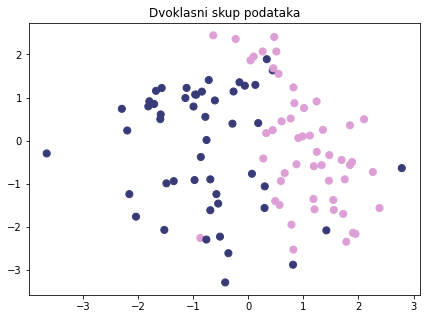

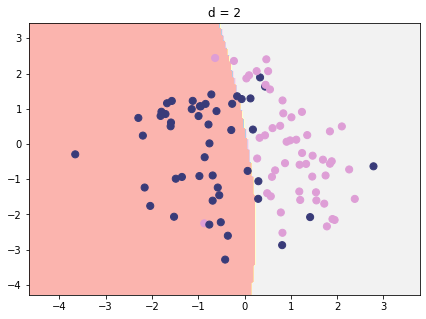

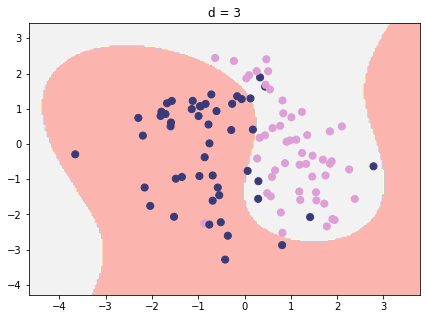

In [28]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_classification

# Va≈° k√¥d ovdje
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_classes=2, n_clusters_per_class=2)
plt.figure(figsize=(7, 5))
plot_2d_clf_problem(X, y)
plt.title('Dvoklasni skup podataka')

d = [2, 3]
for i in d:
  phi = PolynomialFeatures(i)
  ùöΩ = phi.fit_transform(X)
  model = LogisticRegression().fit(ùöΩ, y)
  plt.figure(figsize=(7, 5))
  plot_2d_clf_problem(X, y, lambda x : model.predict(phi.transform(x)))
  plt.title('d = {}'.format(i))

**Q:** Koji biste stupanj polinoma upotrijebili i za≈°to? Je li taj odabir povezan s odabirom regularizacijskog faktora $\alpha$? Za≈°to?